Analyze the spam collection dataset to :-

    1.View information on dataset
    2.View length of messages
    3. Define a function for stopwords
    4. Apply bag of words
    5. Apply TfIdf transformer
    6.Detect spam with NB model
    

In [1]:
import pandas as pd
import numpy as np

In [2]:
#text processing
import re
import string
import nltk
from nltk.corpus import brown,stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer,WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [3]:
#Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [54]:
#ML libaraies
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
df=pd.read_csv(r"D:\bakup c drive\Desktop\DS Python\NLP\NLP Project-1\SpamCollection\SpamCollection",sep='\t',names=['response','message'])

In [9]:
df.head()

,response,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5572, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
response    5572 non-null object
message     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.describe()

,response,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [24]:
df.groupby(['response']).describe()

message                                                            \
           count unique                                                top   
response                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
response       
ham        30  
spam        4

In [15]:
df['response'].value_counts()

ham     4825
spam     747
Name: response, dtype: int64

In [25]:
df['length of message']=df['message'].apply(len)

In [26]:
df.head(3)

,response,message,length of message
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [18]:
# Function for stopwords

In [40]:
def message_preprocess(mess):
    no_punct=[char for char in mess if char not in string.punctuation]
    no_punct=''.join(no_punct)
    return [word for word in no_punct.split() if word.lower() not in stopwords.words('english') ]

In [42]:
#stopwords_punct=set(string.punctuation)
#stopwords_en=set('english')
#stopwords_combined=set.union(stopwords_punct,stopwords_en)
#mess=list(df['message'])

#[word for word in mess if word.lower() not in stopwords_combined ]

In [41]:
print(message_preprocess(df['message']))

['Go', 'jurong', 'point,', 'crazy..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'got', 'amore', 'wat...Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005.', 'Text', 'FA', '87121', 'receive', 'entry', 'question(std', 'txt', "rate)T&C's", 'apply', "08452810075over18'sU", 'dun', 'say', 'early', 'hor...', 'U', 'c', 'already', 'say...Nah', 'think', 'goes', 'usf,', 'lives', 'around', 'thoughFreeMsg', 'Hey', 'darling', '3', "week's", 'word', 'back!', "I'd", 'like', 'fun', 'still?', 'Tb', 'ok!', 'XxX', 'std', 'chgs', 'send,', '£1.50', 'rcvEven', 'brother', 'like', 'speak', 'me.', 'treat', 'like', 'aids', 'patent.As', 'per', 'request', "'Melle", 'Melle', '(Oru', 'Minnaminunginte', 'Nurungu', "Vettam)'", 'set', 'callertune', 'Callers.', 'Press', '*9', 'copy', 'friends', 'CallertuneWINNER!!', 'valued', 'network', 'customer', 'selected', 'receivea', '£900', 'prize', 'reward!',

In [49]:
#Start the vectorizer
vect_tfidf=TfidfVectorizer(analyzer=message_preprocess)
vect_tfidf.fit(df['message'])

TfidfVectorizer(analyzer=<function message_preprocess at 0x00000207332C4EE8>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [50]:
feature_names=vect_tfidf.get_feature_names()

In [51]:
len(vect_tfidf.vocabulary_)

11425

In [53]:
x_train=vect_tfidf.transform(df['message'])

In [55]:
x_train_dtm=x_train.toarray()

In [57]:
x_train_df=pd.DataFrame(x_train_dtm, columns=feature_names)

In [58]:
spam_detect_model=MultinomialNB()

In [59]:
spam_detect_model.fit(x_train_df,df['response'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
predictions=spam_detect_model.predict(x_train_df)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(df['response'],predictions)

0.9793610911701364

In [64]:
# Check the prediction for message#2
print("Actual response:-", df['response'][2])
print('Model prediction:-',predictions[2])

Actual response:- spam
Model prediction:- spam


In [65]:
# Check the prediction for message#5
print("Actual response:-", df['response'][5])
print('Model prediction:-',predictions[5])

Actual response:- spam
Model prediction:- ham


In [72]:
# print(classification_report(df['response'],predictions))

In [68]:
confusion_matrix(df['response'],predictions)

array([[4825,    0],
       [ 115,  632]], dtype=int64)

In [70]:
df['response'].value_counts()

ham     4825
spam     747
Name: response, dtype: int64

In [71]:
# All ham messages are correctly identified, but some of the spam messages are incorrectly classified as ham.
# There is 85% recall in spam detection, ie 85% spam messages are correctly identified

# Word CLOUd

In [76]:
ham_msg=df.loc[df['response']=='ham','message']

In [77]:
ham_msg[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object

In [107]:
#pip install wordcloud

In [101]:
from wordcloud import WordCloud
words_ham=' '.join(ham_msg)
wordcloud=WordCloud(width=800,height=800, background_color='white',min_font_size=10,margin=0).generate(text=words_ham)

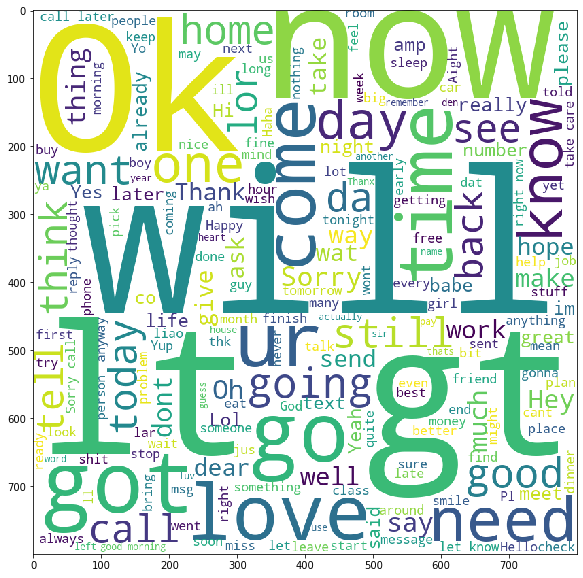

In [106]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.show()

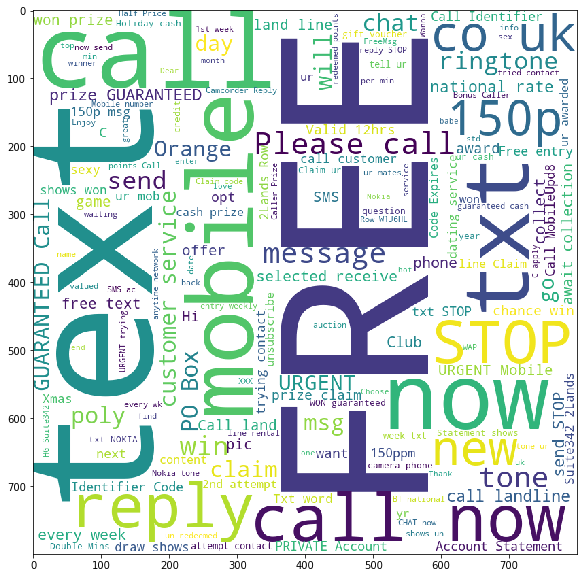

In [111]:
spam_msg=df.loc[df['response']=='spam','message']
word_spam=' '.join(spam_msg)
wordcloud=WordCloud(width=800,height=800, background_color='white',min_font_size=10,margin=0).generate(text=word_spam)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.show()